In [1]:
import numpy as np
import pandas as pd

In [2]:
heart_data=pd.read_csv("heart_disease.csv")

In [3]:
heart_data


,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,SleepTime,Asthma,KidneyDisease,SkinCancer
0,No,16.60,Yes,No,No,3.0,30.0,No,Female,55-59,White,Yes,Yes,Very good,5.0,Yes,No,Yes
1,No,20.34,No,No,Yes,0.0,0.0,No,Female,80 or older,White,No,Yes,Very good,7.0,No,No,No
2,No,26.58,Yes,No,No,20.0,30.0,No,Male,65-69,White,Yes,Yes,Fair,8.0,Yes,No,No
3,No,24.21,No,No,No,0.0,0.0,No,Female,75-79,White,No,No,Good,6.0,No,No,Yes
4,No,23.71,No,No,No,28.0,0.0,Yes,Female,40-44,White,No,Yes,Very good,8.0,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
319790,Yes,27.41,Yes,No,No,7.0,0.0,Yes,Male,60-64,Hispanic,Yes,No,Fair,6.0,Yes,No,No
319791,No,29.84,Yes,No,No,0.0,0.0,No,Male,35-39,Hispanic,No,Yes,Very good,5.0,Yes,No,No
319792,No,24.24,No,No,No,0.0,0.0,No,Female,45-49,Hispanic,No,Yes,Good,6.0,No,No,No
319793,No,32.81,No,No,No,0.0,0.0,No,Female,25-29,Hispanic,No,No,Good,12.0,No,No,No


In [4]:
heart_data.columns

Index(['HeartDisease', 'BMI', 'Smoking', 'AlcoholDrinking', 'Stroke',
       'PhysicalHealth', 'MentalHealth', 'DiffWalking', 'Sex', 'AgeCategory',
       'Race', 'Diabetic', 'PhysicalActivity', 'GenHealth', 'SleepTime',
       'Asthma', 'KidneyDisease', 'SkinCancer'],
      dtype='object')

In [5]:
heart_data.isna().sum()

HeartDisease          0
BMI                   6
Smoking              74
AlcoholDrinking     115
Stroke               21
PhysicalHealth       17
MentalHealth         14
DiffWalking          33
Sex                 313
AgeCategory          44
Race                 39
Diabetic             33
PhysicalActivity     16
GenHealth           493
SleepTime           219
Asthma                0
KidneyDisease        17
SkinCancer            0
dtype: int64

In [6]:
heart_data['BMI'].dtype

dtype('float64')

In [7]:
heart_data['BMI'].fillna(heart_data['BMI'].mean(),inplace=True)

In [8]:
heart_data['Smoking'].fillna(heart_data['Smoking'].mode()[0],inplace=True)

In [9]:
fill_values = {
    'SleepTime': heart_data['SleepTime'].median(),
    'MentalHealth': heart_data['MentalHealth'].mean(),
    'PhysicalHealth': heart_data['PhysicalHealth'].median(),
    'AlcoholDrinking': heart_data['AlcoholDrinking'].mode()[0],
    'Stroke': heart_data['Stroke'].mode()[0],
    'DiffWalking': heart_data['DiffWalking'].mode()[0],
    'Sex': heart_data['Sex'].mode()[0],
    'Race': heart_data['Race'].mode()[0],
    'Diabetic': heart_data['Diabetic'].mode()[0],
    'PhysicalActivity': heart_data['PhysicalActivity'].mode()[0],
    'GenHealth': heart_data['GenHealth'].mode()[0],
    'KidneyDisease': heart_data['KidneyDisease'].mode()[0]  
}
heart_data = heart_data.fillna(fill_values)


In [10]:
heart_data['AgeCategory'].fillna(heart_data['AgeCategory'].mode()[0],inplace=True)

In [11]:
heart_data.isna().sum()


HeartDisease        0
BMI                 0
Smoking             0
AlcoholDrinking     0
Stroke              0
PhysicalHealth      0
MentalHealth        0
DiffWalking         0
Sex                 0
AgeCategory         0
Race                0
Diabetic            0
PhysicalActivity    0
GenHealth           0
SleepTime           0
Asthma              0
KidneyDisease       0
SkinCancer          0
dtype: int64

In [12]:
import matplotlib.pyplot as plt


In [13]:
class_distribution = heart_data['Smoking'].value_counts()
print(class_distribution)

Smoking
No     187917
Yes    131878
Name: count, dtype: int64


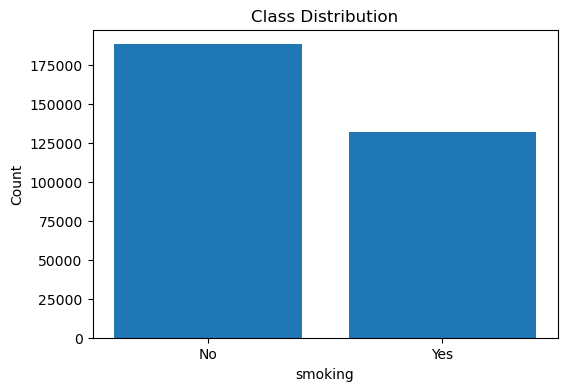

In [14]:
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('smoking')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [15]:
class_distribution = heart_data['HeartDisease'].value_counts()
print(class_distribution)

HeartDisease
No     292422
Yes     27373
Name: count, dtype: int64


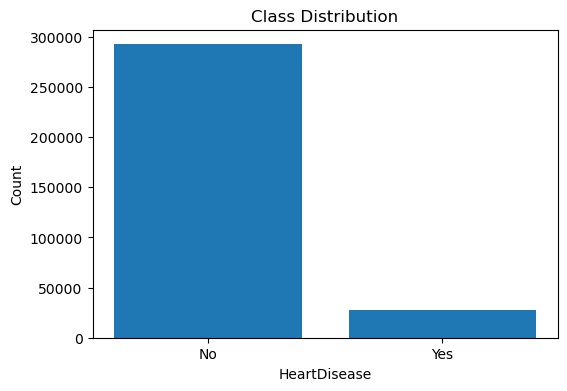

In [16]:
plt.figure(figsize=(6, 4))
plt.bar(class_distribution.index, class_distribution.values)
plt.xlabel('HeartDisease')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()

In [17]:
from sklearn.preprocessing import LabelEncoder
label_enc=LabelEncoder()

In [18]:
heart_data['Smoking']=label_enc.fit_transform(heart_data['Smoking'])

In [19]:
heart_data['Smoking']

0         1
1         0
2         1
3         0
4         0
         ..
319790    1
319791    1
319792    0
319793    0
319794    0
Name: Smoking, Length: 319795, dtype: int32

In [20]:
heart_data['AlcoholDrinking_esc']=label_enc.fit_transform(heart_data['AlcoholDrinking'])
heart_data['Stroke_enc']=label_enc.fit_transform(heart_data['Stroke'])
heart_data['DiffWalking_enc']=label_enc.fit_transform(heart_data['DiffWalking'])
heart_data['Sex_enc']=label_enc.fit_transform(heart_data['Sex'])
heart_data['AgeCategory_enc']=label_enc.fit_transform(heart_data['AgeCategory'])
heart_data['Race_enc']=label_enc.fit_transform(heart_data['Race'])
heart_data['Diabetic_enc']=label_enc.fit_transform(heart_data['Diabetic'])
heart_data['PhysicalActivity_enc']=label_enc.fit_transform(heart_data['PhysicalActivity'])
heart_data['GenHealth_enc']=label_enc.fit_transform(heart_data['GenHealth'])
heart_data['Asthma_enc']=label_enc.fit_transform(heart_data['Asthma'])
heart_data['KidneyDisease_enc']=label_enc.fit_transform(heart_data['KidneyDisease'])
heart_data['SkinCancer_enc']=label_enc.fit_transform(heart_data['SkinCancer'])


In [23]:
heart_data[['AlcoholDrinking','AlcoholDrinking_esc']]

,AlcoholDrinking,AlcoholDrinking_esc
0,No,0
1,No,0
2,No,0
3,No,0
4,No,0
...,...,...
319790,No,0
319791,No,0
319792,No,0
319793,No,0


In [24]:
heart_data[['Stroke_enc','Stroke']]


,Stroke_enc,Stroke
0,0,No
1,1,Yes
2,0,No
3,0,No
4,0,No
...,...,...
319790,0,No
319791,0,No
319792,0,No
319793,0,No


In [25]:
heart_data[['DiffWalking_enc','DiffWalking']]

,DiffWalking_enc,DiffWalking
0,0,No
1,0,No
2,0,No
3,0,No
4,1,Yes
...,...,...
319790,1,Yes
319791,0,No
319792,0,No
319793,0,No


In [26]:
heart_data[['Sex_enc','Sex']]

,Sex_enc,Sex
0,0,Female
1,0,Female
2,1,Male
3,0,Female
4,0,Female
...,...,...
319790,1,Male
319791,1,Male
319792,0,Female
319793,0,Female


In [27]:
heart_data[['AgeCategory_enc','AgeCategory']]

,AgeCategory_enc,AgeCategory
0,7,55-59
1,12,80 or older
2,9,65-69
3,11,75-79
4,4,40-44
...,...,...
319790,8,60-64
319791,3,35-39
319792,5,45-49
319793,1,25-29


In [28]:
heart_data[['Race_enc','Race']]

,Race_enc,Race
0,5,White
1,5,White
2,5,White
3,5,White
4,5,White
...,...,...
319790,3,Hispanic
319791,3,Hispanic
319792,3,Hispanic
319793,3,Hispanic


In [29]:
heart_data[['Diabetic_enc','Diabetic']]

,Diabetic_enc,Diabetic
0,2,Yes
1,0,No
2,2,Yes
3,0,No
4,0,No
...,...,...
319790,2,Yes
319791,0,No
319792,0,No
319793,0,No


In [30]:
heart_data[['PhysicalActivity_enc','PhysicalActivity']]

,PhysicalActivity_enc,PhysicalActivity
0,1,Yes
1,1,Yes
2,1,Yes
3,0,No
4,1,Yes
...,...,...
319790,0,No
319791,1,Yes
319792,1,Yes
319793,0,No


In [31]:
heart_data[['GenHealth_enc','GenHealth']]

,GenHealth_enc,GenHealth
0,4,Very good
1,4,Very good
2,1,Fair
3,2,Good
4,4,Very good
...,...,...
319790,1,Fair
319791,4,Very good
319792,2,Good
319793,2,Good


In [32]:
heart_data[['GenHealth_enc','GenHealth']]

,GenHealth_enc,GenHealth
0,4,Very good
1,4,Very good
2,1,Fair
3,2,Good
4,4,Very good
...,...,...
319790,1,Fair
319791,4,Very good
319792,2,Good
319793,2,Good


In [33]:
heart_data[['Asthma_enc','Asthma']]

,Asthma_enc,Asthma
0,1,Yes
1,0,No
2,1,Yes
3,0,No
4,0,No
...,...,...
319790,1,Yes
319791,1,Yes
319792,0,No
319793,0,No


In [34]:
heart_data[['KidneyDisease_enc','KidneyDisease']]

,KidneyDisease_enc,KidneyDisease
0,0,No
1,0,No
2,0,No
3,0,No
4,0,No
...,...,...
319790,0,No
319791,0,No
319792,0,No
319793,0,No


In [35]:
heart_data[['SkinCancer_enc','SkinCancer']]

,SkinCancer_enc,SkinCancer
0,1,Yes
1,0,No
2,0,No
3,1,Yes
4,0,No
...,...,...
319790,0,No
319791,0,No
319792,0,No
319793,0,No


In [36]:
heart_data.to_csv("heart_disease.csv")

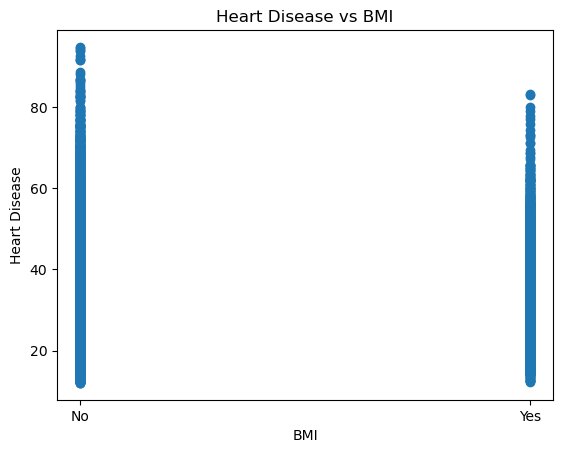

In [37]:
plt.scatter(heart_data['HeartDisease'],heart_data['BMI'])
plt.title("Heart Disease vs BMI")
plt.xlabel('BMI')
plt.ylabel('Heart Disease')
plt.show()

In [38]:
heart_data.head()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,DiffWalking_enc,Sex_enc,AgeCategory_enc,Race_enc,Diabetic_enc,PhysicalActivity_enc,GenHealth_enc,Asthma_enc,KidneyDisease_enc,SkinCancer_enc
0,No,16.60,1,No,No,3.0,30.0,No,Female,55-59,...,0,0,7,5,2,1,4,1,0,1
1,No,20.34,0,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,12,5,0,1,4,0,0,0
2,No,26.58,1,No,No,20.0,30.0,No,Male,65-69,...,0,1,9,5,2,1,1,1,0,0
3,No,24.21,0,No,No,0.0,0.0,No,Female,75-79,...,0,0,11,5,0,0,2,0,0,1
4,No,23.71,0,No,No,28.0,0.0,Yes,Female,40-44,...,1,0,4,5,0,1,4,0,0,0


In [39]:
heart_data.head(5)

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,DiffWalking_enc,Sex_enc,AgeCategory_enc,Race_enc,Diabetic_enc,PhysicalActivity_enc,GenHealth_enc,Asthma_enc,KidneyDisease_enc,SkinCancer_enc
0,No,16.60,1,No,No,3.0,30.0,No,Female,55-59,...,0,0,7,5,2,1,4,1,0,1
1,No,20.34,0,No,Yes,0.0,0.0,No,Female,80 or older,...,0,0,12,5,0,1,4,0,0,0
2,No,26.58,1,No,No,20.0,30.0,No,Male,65-69,...,0,1,9,5,2,1,1,1,0,0
3,No,24.21,0,No,No,0.0,0.0,No,Female,75-79,...,0,0,11,5,0,0,2,0,0,1
4,No,23.71,0,No,No,28.0,0.0,Yes,Female,40-44,...,1,0,4,5,0,1,4,0,0,0


In [40]:
heart_data.tail()

,HeartDisease,BMI,Smoking,AlcoholDrinking,Stroke,PhysicalHealth,MentalHealth,DiffWalking,Sex,AgeCategory,...,DiffWalking_enc,Sex_enc,AgeCategory_enc,Race_enc,Diabetic_enc,PhysicalActivity_enc,GenHealth_enc,Asthma_enc,KidneyDisease_enc,SkinCancer_enc
319790,Yes,27.41,1,No,No,7.0,0.0,Yes,Male,60-64,...,1,1,8,3,2,0,1,1,0,0
319791,No,29.84,1,No,No,0.0,0.0,No,Male,35-39,...,0,1,3,3,0,1,4,1,0,0
319792,No,24.24,0,No,No,0.0,0.0,No,Female,45-49,...,0,0,5,3,0,1,2,0,0,0
319793,No,32.81,0,No,No,0.0,0.0,No,Female,25-29,...,0,0,1,3,0,0,2,0,0,0
319794,No,46.56,0,No,No,0.0,0.0,No,Female,80 or older,...,0,0,12,3,0,1,2,0,0,0


In [41]:
heart_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 319795 entries, 0 to 319794
Data columns (total 30 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HeartDisease          319795 non-null  object 
 1   BMI                   319795 non-null  float64
 2   Smoking               319795 non-null  int32  
 3   AlcoholDrinking       319795 non-null  object 
 4   Stroke                319795 non-null  object 
 5   PhysicalHealth        319795 non-null  float64
 6   MentalHealth          319795 non-null  float64
 7   DiffWalking           319795 non-null  object 
 8   Sex                   319795 non-null  object 
 9   AgeCategory           319795 non-null  object 
 10  Race                  319795 non-null  object 
 11  Diabetic              319795 non-null  object 
 12  PhysicalActivity      319795 non-null  object 
 13  GenHealth             319795 non-null  object 
 14  SleepTime             319795 non-null  float64
 15  

In [42]:
heart_data.describe()

,BMI,Smoking,PhysicalHealth,MentalHealth,SleepTime,AlcoholDrinking_esc,Stroke_enc,DiffWalking_enc,Sex_enc,AgeCategory_enc,Race_enc,Diabetic_enc,PhysicalActivity_enc,GenHealth_enc,Asthma_enc,KidneyDisease_enc,SkinCancer_enc
count,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000,319795.000000
mean,28.325348,0.412383,3.371425,3.898384,7.096856,0.068081,0.037737,0.138836,0.474964,6.514555,4.396892,0.300346,0.775378,2.223287,0.134061,0.036827,0.093244
std,6.356075,0.492264,7.950489,7.955117,1.435676,0.251885,0.190559,0.345776,0.499374,3.564578,1.212097,0.716434,0.417334,1.535150,0.340718,0.188336,0.290775
min,12.020000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,24.030000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,4.000000,5.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000
50%,27.340000,0.000000,0.000000,0.000000,7.000000,0.000000,0.000000,0.000000,0.000000,7.000000,5.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000
75%,31.420000,1.000000,2.000000,3.000000,8.000000,0.000000,0.000000,0.000000,1.000000,9.000000,5.000000,0.000000,1.000000,4.000000,0.000000,0.000000,0.000000
max,94.850000,1.000000,30.000000,30.000000,24.000000,1.000000,1.000000,1.000000,1.000000,12.000000,5.000000,3.000000,1.000000,4.000000,1.000000,1.000000,1.000000


In [43]:
heart_data.describe(include='object')

,HeartDisease,AlcoholDrinking,Stroke,DiffWalking,Sex,AgeCategory,Race,Diabetic,PhysicalActivity,GenHealth,Asthma,KidneyDisease,SkinCancer
count,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795,319795
unique,2,2,2,2,2,13,6,4,2,5,2,2,2
top,No,No,No,No,Female,65-69,White,No,Yes,Very good,No,No,No
freq,292422,298023,307727,275396,167904,34187,245228,269659,247962,114150,276923,308018,289976
